<a href="https://colab.research.google.com/github/JAYANTHNITW/Dogs-Vs-Cats-Classifier/blob/main/Dogs_Vs_Cats_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:48<00:00, 23.5MB/s]
100% 1.06G/1.06G [00:48<00:00, 23.7MB/s]


In [6]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

# Let's Build Dogs🐶 Vs Cats😻 Classification Model

In [8]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten,MaxPooling2D,Dropout,Conv2D

In [9]:
# Generators
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size=(256,256)
)

validation_ds = train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [10]:
# Normilize
def process(image,label):
  image = tf.cast(image/255,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [11]:
# Create CNN model

model = Sequential()

# Layer 1
model.add(Conv2D(10,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

# Layer 2
model.add(Conv2D(20,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

# Layer 3
model.add(Conv2D(40,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

# Layer 4
model.add(Conv2D(80,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(80,activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 10)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 20)      1820      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 20)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 40)        7240      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 40)       0

In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
157/157 [==============================] - 19s 117ms/step - loss: 0.0249 - accuracy: 0.9922 - val_loss: 0.0143 - val_accuracy: 0.9952
Epoch 2/10
157/157 [==============================] - 19s 122ms/step - loss: 0.0132 - accuracy: 0.9958 - val_loss: 0.0157 - val_accuracy: 0.9956
Epoch 3/10
157/157 [==============================] - 18s 114ms/step - loss: 0.0226 - accuracy: 0.9928 - val_loss: 0.0217 - val_accuracy: 0.9940
Epoch 4/10
157/157 [==============================] - 18s 114ms/step - loss: 0.0270 - accuracy: 0.9926 - val_loss: 0.0296 - val_accuracy: 0.9898
Epoch 5/10
157/157 [==============================] - 18s 113ms/step - loss: 0.0258 - accuracy: 0.9922 - val_loss: 0.0148 - val_accuracy: 0.9946
Epoch 6/10
157/157 [==============================] - 20s 124ms/step - loss: 0.0104 - accuracy: 0.9970 - val_loss: 0.0103 - val_accuracy: 0.9970
Epoch 7/10
157/157 [==============================] - 19s 116ms/step - loss: 0.0076 - accuracy: 0.9982 - val_loss: 0.0057 - val_ac

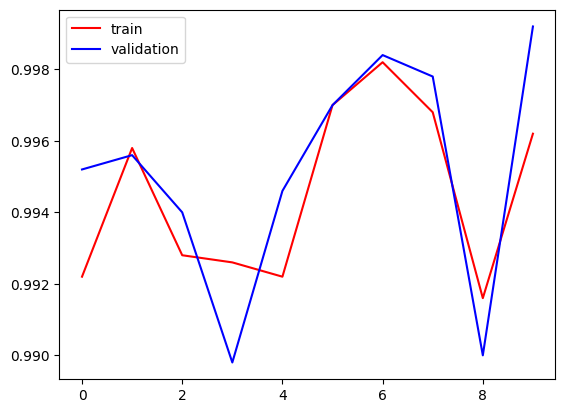

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

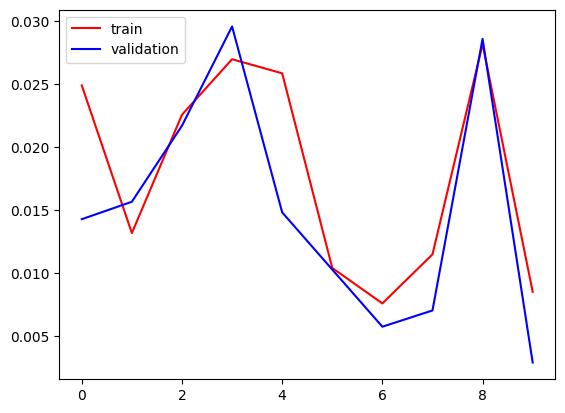

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [21]:
import cv2

In [22]:
test_img = cv2.imread('/content/dog_on_the_beach_196598.jpg')

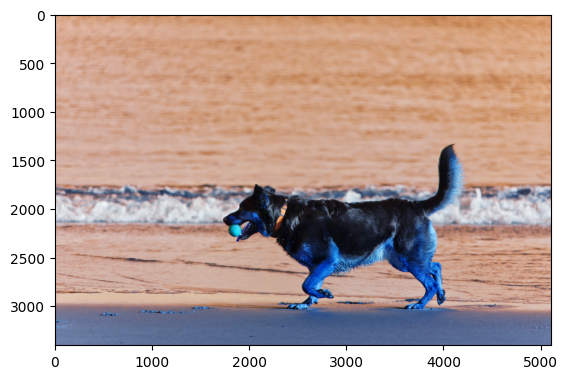

In [23]:
plt.imshow(test_img)

In [24]:
test_img.shape

(3404, 5106, 3)

In [25]:
test_img = cv2.resize(test_img,(256,256))

In [26]:
test_input = test_img.reshape((1,256,256,3))

In [28]:
model.predict(test_input)

1/1 [==============================] - 0s 474ms/step


array([[1.]], dtype=float32)